In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [ ]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
VNI = pd.read_csv("https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/VNI.csv",parse_dates=['Date'])
VNItest = pd.read_csv("https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/VNI.csv",parse_dates=['Date'])

feature = ['Price','Open','High','Low','Vol.','Change %']

for i in feature:
  VNI[i]=VNI[i].apply(lambda x: x.replace(',',''))
  VNI[i]=VNI[i].apply(lambda x: x.replace('K',''))
  VNI[i]=VNI[i].apply(lambda x: x.replace('M',''))
  VNI[i]=VNI[i].apply(lambda x: x.replace('%',''))

  VNItest[i]=VNItest[i].apply(lambda x: x.replace(',',''))
  VNItest[i]=VNItest[i].apply(lambda x: x.replace('K',''))
  VNItest[i]=VNItest[i].apply(lambda x: x.replace('M',''))
  VNItest[i]=VNItest[i].apply(lambda x: x.replace('%',''))
VNI=VNI.iloc[::-1]
VNItest=VNItest.iloc[::-1]

In [ ]:
for i in feature:
  VNI[i] = pd.to_numeric(VNI[i])
  VNItest[i] = pd.to_numeric(VNItest[i])
VNI.reset_index(inplace=True)
VNI.drop(columns=['index'],inplace=True)
VNItest.reset_index(inplace=True)
VNItest.drop(columns=['index'],inplace=True)

In [ ]:
x_train = np.array(VNI.index).reshape(-1,1)
y_train = VNI['Price']
x_test = np.array(VNItest.index).reshape(-1,1)
y_test = VNItest['Price']

In [ ]:
model = RandomForestRegressor(max_depth=100,random_state=1,n_estimators=5)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

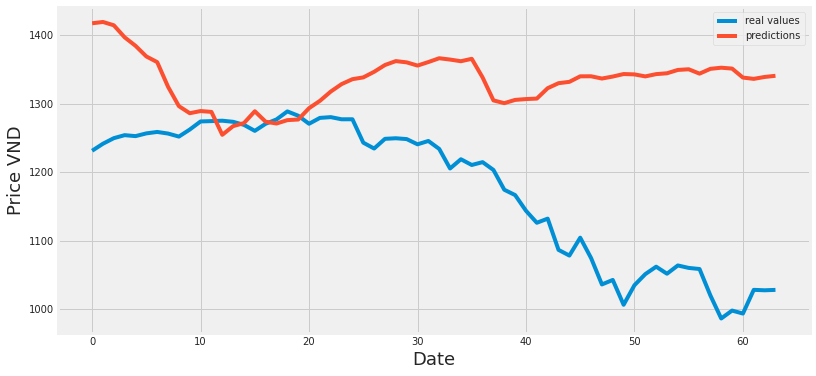

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test)
plt.plot(prediction)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price VND', fontsize=18)
plt.legend(['real values','predictions'],loc='upper right')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)

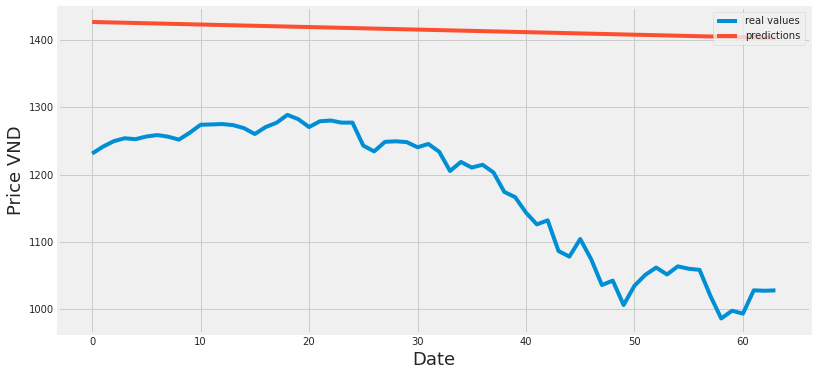

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test)
plt.plot(prediction)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price VND', fontsize=18)
plt.legend(['real values','predictions'],loc='upper right')
plt.show()